In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

C:\Users\Hacker\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('jshare.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


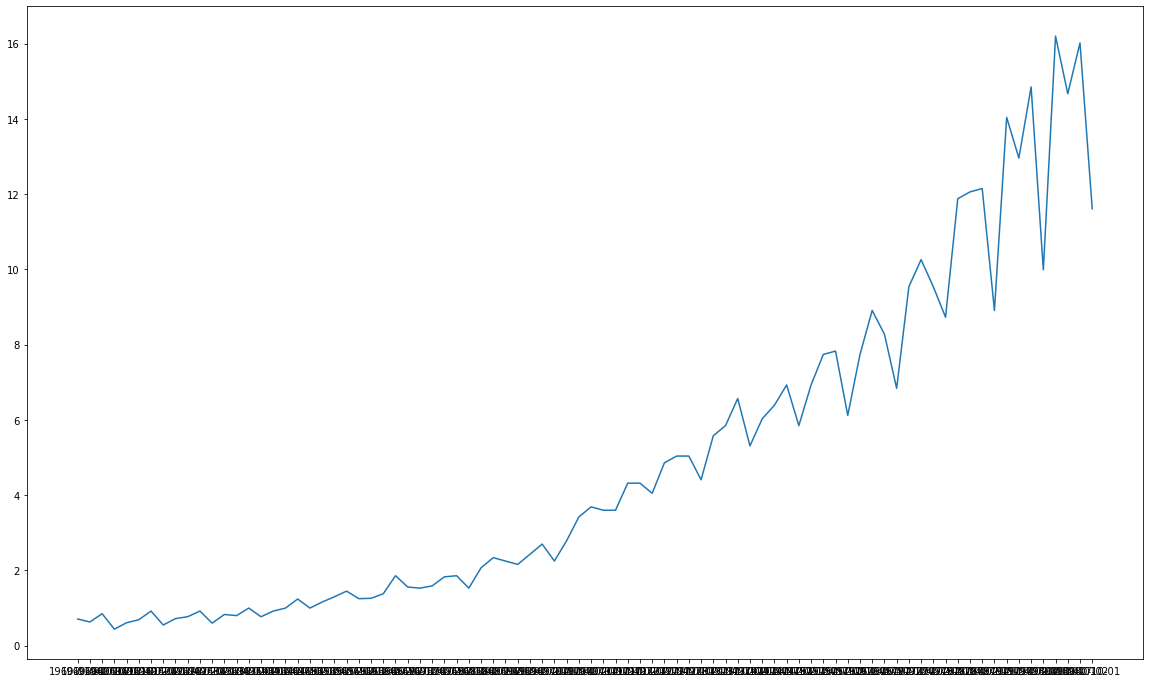

In [3]:
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'])
plt.show()

In [4]:
adfuller(data['data']) # Null --> None stationary

(2.7420165734574735,
 1.0,
 11,
 72,
 {'1%': -3.524624466842421,
  '5%': -2.9026070739026064,
  '10%': -2.5886785262345677},
 82.63760283301102)

In [5]:
data['data'] = np.log(data['data'])

In [6]:
adfuller(data['data'])

(-0.8040574622338387,
 0.8179273123168606,
 4,
 79,
 {'1%': -3.5159766913976376,
  '5%': -2.898885703483903,
  '10%': -2.5866935058484217},
 -142.1892728398871)

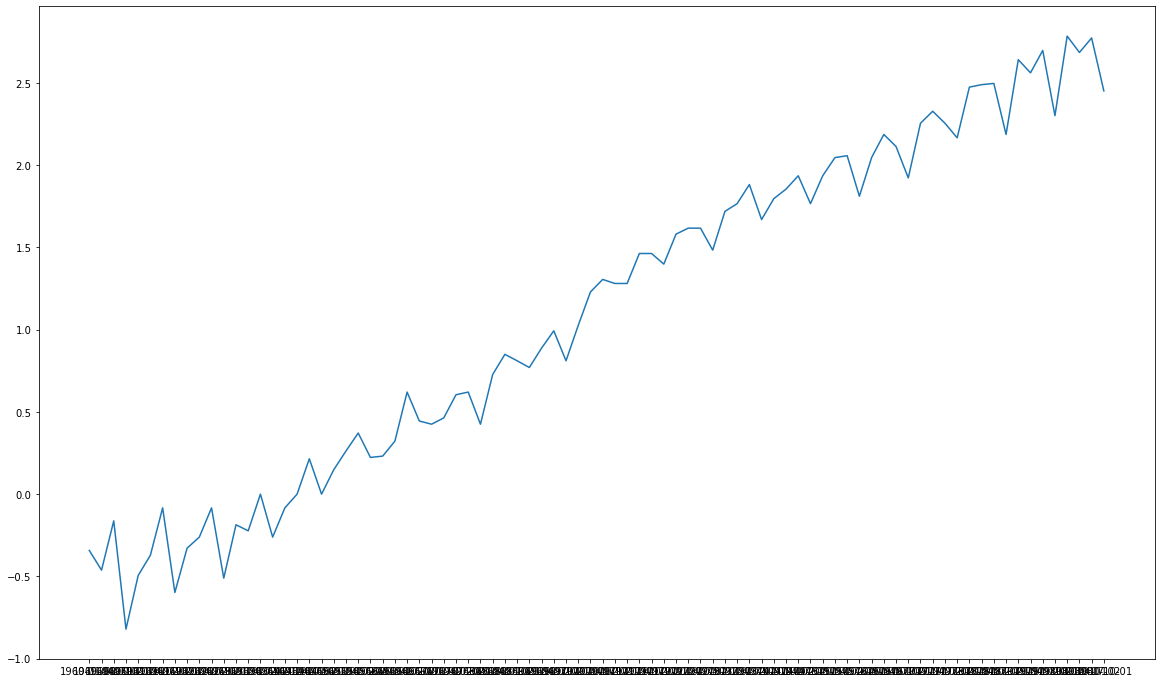

In [7]:
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'])
plt.show()

In [8]:
sample = pd.Series([1, 1, 2, 3 ,5, 8, 13, 21, 34, 55])
sample.diff(4)

0     NaN
1     NaN
2     NaN
3     NaN
4     4.0
5     7.0
6    11.0
7    18.0
8    29.0
9    47.0
dtype: float64

In [9]:
data['data'] = data['data'].diff()

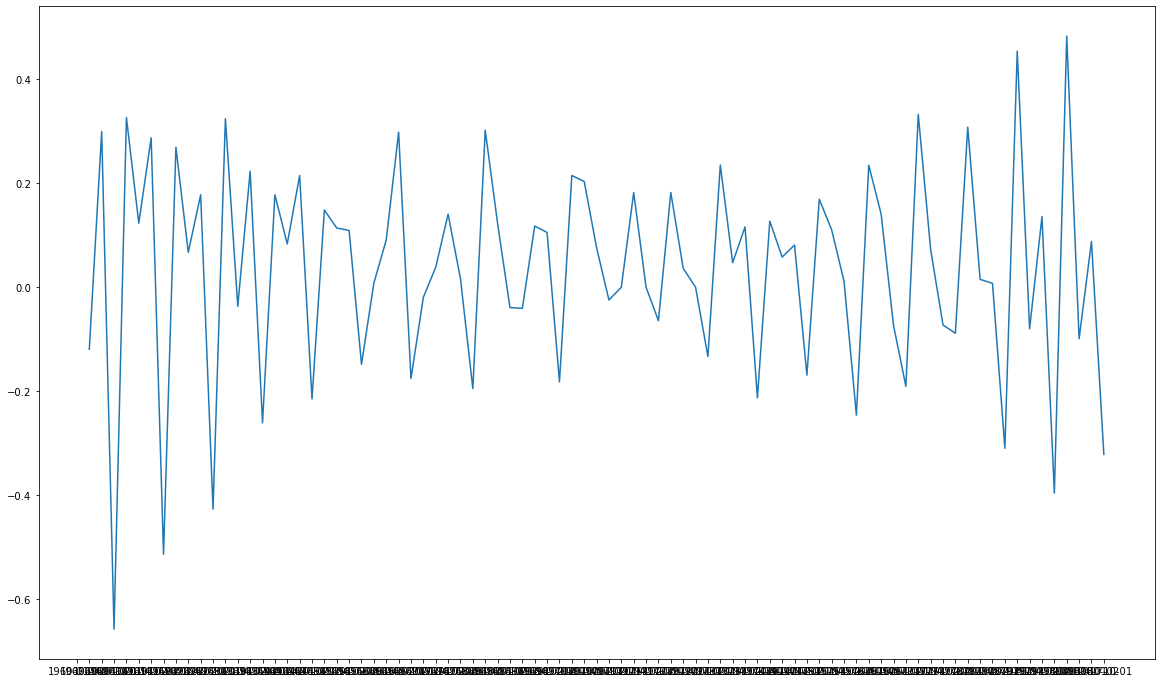

In [10]:
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'])
plt.show()

In [11]:
data = data.drop(data.index[0])
adfuller(data['data'])

(-4.317043945811843,
 0.00041497314044405543,
 5,
 77,
 {'1%': -3.518281134660583,
  '5%': -2.899878185191432,
  '10%': -2.5872229937594873},
 -140.7202208245293)

In [12]:
data['data'] = data['data'].diff(4)

In [13]:
data

,date,data
1,1960-04-01,NaN
2,1960-07-02,NaN
3,1960-10-01,NaN
4,1961-01-01,NaN
5,1961-04-02,0.242778
...,...,...
79,1979-10-01,-0.086260
80,1980-01-01,0.028690
81,1980-04-01,-0.019164
82,1980-07-02,-0.048099


In [14]:
data = data.drop([1, 2, 3, 4], axis=0)
adfuller(data['data'])

(-6.63080510991426,
 5.721578695136251e-09,
 5,
 73,
 {'1%': -3.5232835753964475,
  '5%': -2.902030597326081,
  '10%': -2.5883710883843123},
 -130.6040481022201)

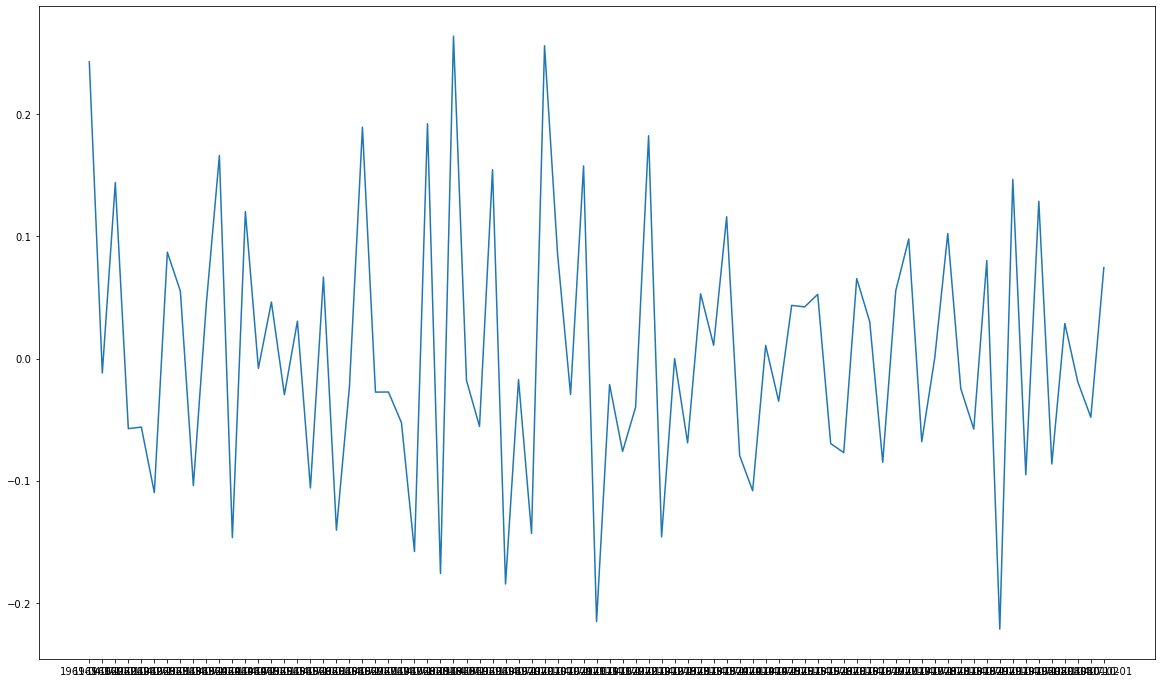

In [15]:
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'])
plt.show()

In [16]:
data2 = pd.read_csv('jshare.csv')
data2.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [17]:
model = SARIMAX(data2['data'], order=(3, 1, 3), seasonal_order=(2, 1, 2, 4))

In [18]:
res = model.fit()

C:\Users\Hacker\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                   data   No. Observations:                   84
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 4)   Log Likelihood                 -39.004
Date:                                Sat, 22 Oct 2022   AIC                            100.007
Time:                                        10:37:05   BIC                            126.071
Sample:                                             0   HQIC                           110.449
                                                 - 84                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5933      0.207     -7.710      0.000      -1.998      -1.188
ar.L2         -0.9827      0.327     -3.001      0.003      -1.624      -0.341
ar.L3         -0.1419      0.193     -0.735      0.462      -0.520       0.236
ma.L1          0.8355      0.596      1.403      0.161      -0.332       2.003
ma.L2          0.0019      0.426      0.004      0.996      -0.834       0.838
ma.L3         -0.6614      0.530     -1.247      0.212      -1.701       0.378
ar.S.L4       -0.3582      0.746     -0.480      0.631      -1.820       1.103
ar.S.L8       -0.7748      0.801     -0.967      0.333      -2.345       0.795
ma.S.L4        0.2547      0.729      0.349      0.727      -1.174       1.683
ma.S.L8        0.8661      0.807      1.073      0.283      -0.715       2.447
sigma2         0.1450      0.122      1.193      0.233      -0.093       0.383
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                21.62
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):              26.51   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
data2['sarimax'] = res.fittedvalues

In [21]:
data2

,date,data,sarimax
0,1960-01-01,0.71,0.000000
1,1960-04-01,0.63,0.710000
2,1960-07-02,0.85,0.630000
3,1960-10-01,0.44,0.850000
4,1961-01-01,0.61,0.795000
...,...,...,...
79,1979-10-01,9.99,10.293788
80,1980-01-01,16.20,16.257795
81,1980-04-01,14.67,14.373615
82,1980-07-02,16.02,16.737921


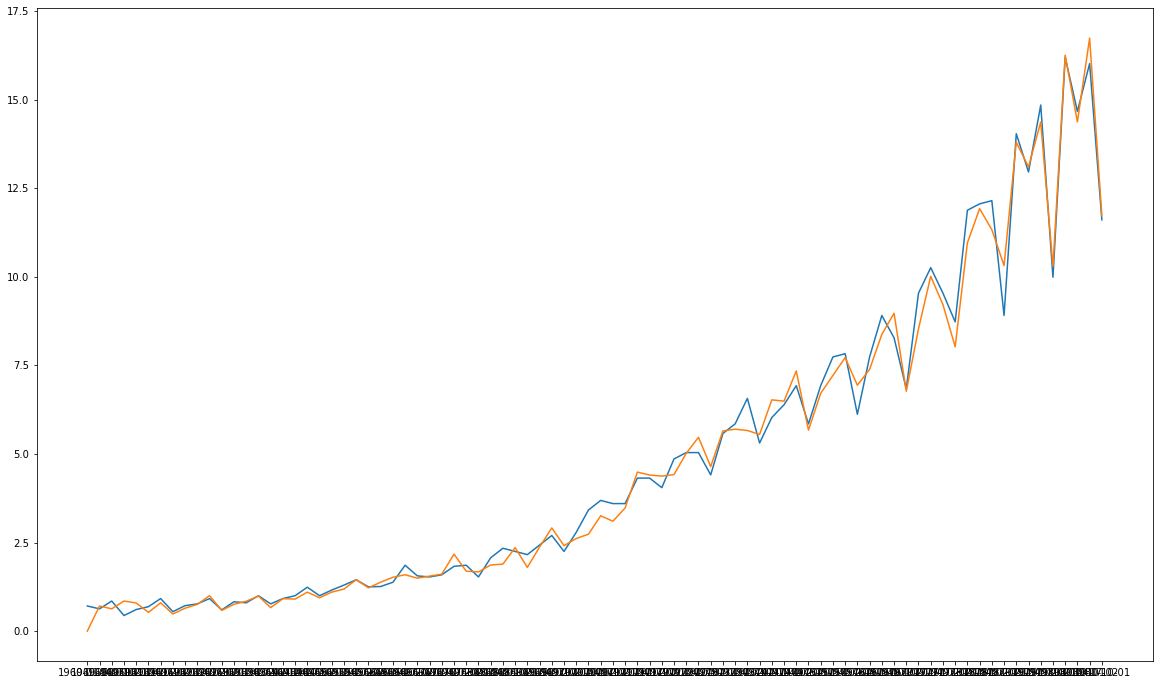

In [22]:
plt.figure(figsize=(20, 12))
plt.plot(data2['date'], data2['data'])
plt.plot(data2['date'], data2['sarimax'])
plt.show()

In [23]:
data2['sarimax'][:5] = np.NAN
forecast = res.predict(start=len(data2), end=len(data2) + 8)

C:\Users\Hacker\AppData\Local\Temp\ipykernel_8484\1891553545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['sarimax'][:5] = np.NAN


In [24]:
data2['sarimax']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
79    10.293788
80    16.257795
81    14.373615
82    16.737921
83    11.728724
Name: sarimax, Length: 84, dtype: float64

In [25]:
len(data2)

84

In [26]:
forecast = data2['sarimax'].append(forecast)

C:\Users\Hacker\AppData\Local\Temp\ipykernel_8484\583517976.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = data2['sarimax'].append(forecast)


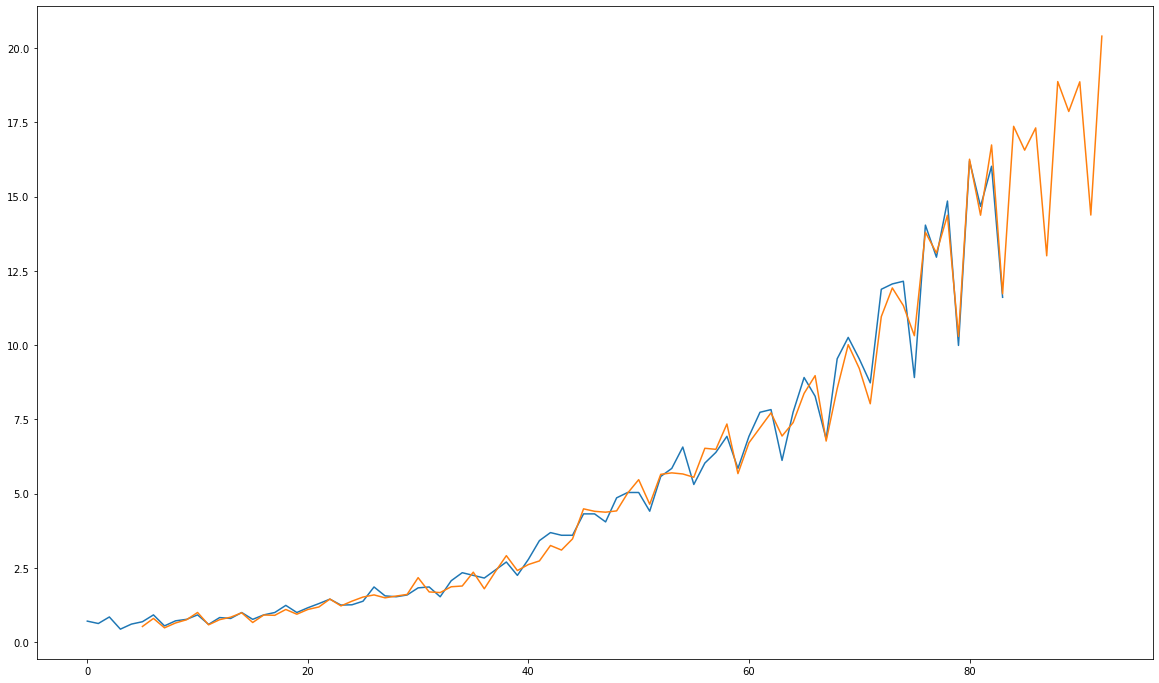

In [27]:
plt.figure(figsize=(20, 12))
plt.plot(data2['data'])
plt.plot(forecast)
plt.show()

In [28]:
p = range(0, 2, 1)
d = 1
q = range(0, 2, 1)
ps = range(0, 2, 1)
ds = 1
qs = range(0, 2, 1)
s = 4
params = list(product(p, q, ps, qs))
params

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [29]:
result = []
for order in params:
    try:
        model = SARIMAX(data2['data'], order=(order[0], d, order[1]), seasonal_order=(order[2], ds, order[3], s))
        res = model.fit()
        result.append([order, res.aic])
    except:
        continue

In [30]:
r = pd.DataFrame(result)
r.columns = ('order', 'AIC')
r.sort_values(by='AIC', ascending=True)

,order,AIC
12,"(1, 1, 0, 0)",98.207760
4,"(0, 1, 0, 0)",100.126011
14,"(1, 1, 1, 0)",100.166907
13,"(1, 1, 0, 1)",100.170544
8,"(1, 0, 0, 0)",100.206514
6,"(0, 1, 1, 0)",100.713769
5,"(0, 1, 0, 1)",100.714480
7,"(0, 1, 1, 1)",101.256783
9,"(1, 0, 0, 1)",102.158002
15,"(1, 1, 1, 1)",102.160852


In [31]:
model = SARIMAX(data2['data'], order=(1, 1 , 1), seasonal_order=(0, 1, 0, 4))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               data   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 4)   Log Likelihood                 -46.104
Date:                            Sat, 22 Oct 2022   AIC                             98.208
Time:                                    10:37:09   BIC                            105.316
Sample:                                         0   HQIC                           101.056
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3005      0.142     -2.114      0.035      -0.579      -0.022
ma.L1         -0.6118      0.091     -6.738      0.000      -0.790      -0.434
sigma2         0.1860      0.023      8.108      0.000       0.141       0.231
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                31.82
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              33.35   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""